In [244]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import data_loader

In [245]:
#Загрузка данных
filepath = 'alzheimers_disease_data.csv'
df = data_loader.load_data(filepath)

In [246]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [247]:
#Обработка (удалили ненужные)
df = df.drop(columns = ['PatientID', 'DoctorInCharge'])

In [248]:
numerical_features = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'ADL']
categorical_features = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
       #'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       #'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       #'Depression', 'HeadInjury', 'Hypertension', 'FunctionalAssessment',
       #'MemoryComplaints', 'BehavioralProblems', 'Confusion',
       #'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       #'Forgetfulness']
features = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'ADL','Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness']
target_column = 'Diagnosis'

SyntaxError: '[' was never closed (621251179.py, line 4)

In [ ]:
#Функция для заполнения пустых значений
def missing_values(df):
    for column in df.columns:
        if df[column].isnull().sum() != 0:
            df[column] = df[column].fillna(df[column].mean())
    
    return df
df = missing_values(df)

In [ ]:
#статистика
df.describe().round(2)


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.00,2149.00,2149.0,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00,...,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00
mean,74.91,0.51,0.7,1.29,27.66,0.29,10.04,4.92,4.99,7.05,...,5.08,0.21,0.16,4.98,0.21,0.16,0.15,0.16,0.30,0.35
std,8.99,0.50,1.0,0.90,7.22,0.45,5.76,2.86,2.91,1.76,...,2.89,0.41,0.36,2.95,0.40,0.37,0.36,0.37,0.46,0.48
min,60.00,0.00,0.0,0.00,15.01,0.00,0.00,0.00,0.01,4.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,67.00,0.00,0.0,1.00,21.61,0.00,5.14,2.57,2.46,5.48,...,2.57,0.00,0.00,2.34,0.00,0.00,0.00,0.00,0.00,0.00
50%,75.00,1.00,0.0,1.00,27.82,0.00,9.93,4.77,5.08,7.12,...,5.09,0.00,0.00,5.04,0.00,0.00,0.00,0.00,0.00,0.00
75%,83.00,1.00,1.0,2.00,33.87,1.00,15.16,7.43,7.56,8.56,...,7.55,0.00,0.00,7.58,0.00,0.00,0.00,0.00,1.00,1.00
max,90.00,1.00,3.0,3.00,39.99,1.00,19.99,9.99,10.00,10.00,...,10.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
#Стандартизация
alc = pd.DataFrame(df[features], columns=features)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(alc)
alc_df_scaled = pd.DataFrame(scaled_data, columns=features)
alc_df_scaled['Diagnosis'] = df[target_column]
alc_df_scaled.columns

Index(['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
       'ADL', 'Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation',
       'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness',
       'Diagnosis'],
      dtype='object')

In [ ]:
#Группируем по таргету
data = alc_df_scaled.groupby(target_column).mean().T
data.head(2)

Diagnosis,0,1
Age,0.004060,-0.007420
BMI,-0.019486,0.035613


In [ ]:
#Находим наибольшее влияние на таргет
data['diff'] = abs(data.iloc[:,0] - data.iloc[:,1])
data = data.sort_values(by = ['diff'], ascending=False)
data.head(10)

Diagnosis,0,1,diff
FunctionalAssessment,0.269915,-0.493306,0.763221
ADL,0.245836,-0.449298,0.695134
MemoryComplaints,-0.226897,0.414685,0.641582
MMSE,0.175402,-0.320570,0.495972
BehavioralProblems,-0.165952,0.303299,0.469251
SleepQuality,0.041829,-0.076447,0.118276
EducationLevel,0.032522,-0.059437,0.091959
CholesterolHDL,-0.031499,0.057569,0.089069
Hypertension,-0.025949,0.047425,0.073373
FamilyHistoryAlzheimers,0.024336,-0.044477,0.068813


In [ ]:
#Разделение на выборки
features = list(data.index[:10])
x = alc_df_scaled[features]
y = alc_df_scaled[target_column]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=42)

In [ ]:
#Тренировка и предсказание
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
#Оценка модели
print(f'Accuracy score:{accuracy_score(y_test, y_pred)}')
print(f'confusion_matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'classification_report: \n {classification_report(y_test, y_pred)}')

Accuracy score:0.8478405315614618
confusion_matrix:
[[891  87]
 [142 385]]
classification_report: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.89       978
           1       0.82      0.73      0.77       527

    accuracy                           0.85      1505
   macro avg       0.84      0.82      0.83      1505
weighted avg       0.85      0.85      0.85      1505



In [ ]:
def visualisation(df,features, target_column, numerical_features):
    # График1
    for feature in features:
        if feature in numerical_features:
            bins = 25
            plt.figure(figsize=(10,6))
            plt.hist(alc_df_scaled.loc[alc_df_scaled[target_column]==0, feature], alpha = 0.5, label = 'Альцгеймер')
            plt.hist(alc_df_scaled.loc[alc_df_scaled[target_column]==1, feature], alpha = 0.5, label = 'Здоров')
            plt.legend(loc = 'upper right')

            plt.xlabel(feature)
            plt.ylabel('Количество наблюдений')
            plt.title(f'Распределение {feature} в зависимости от наличия заболевания')
            plt.show()

    #График2
    for column in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=column, kde=True, bins=20)
        plt.title(f'Распределение по {column}')
        plt.show()


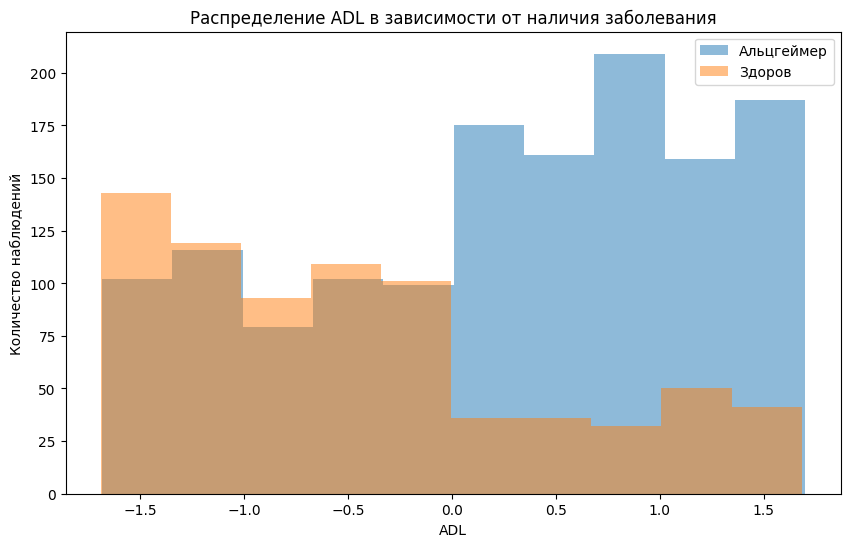

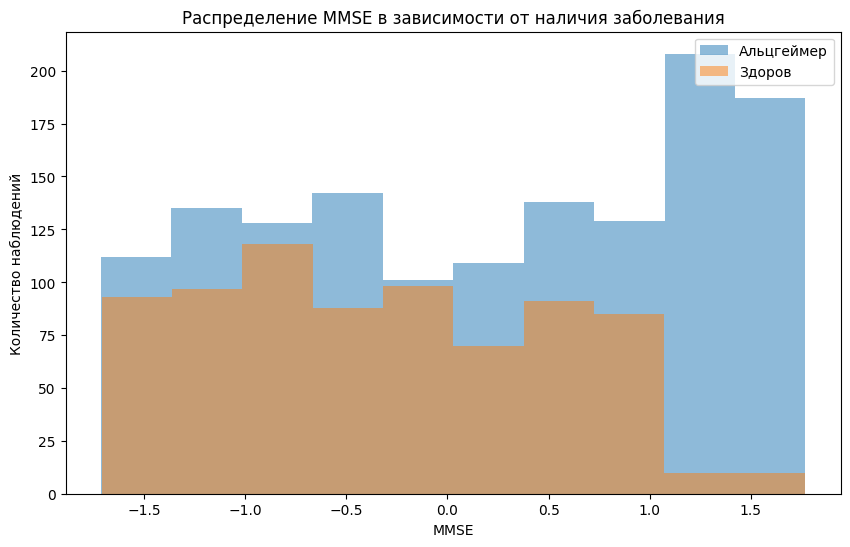

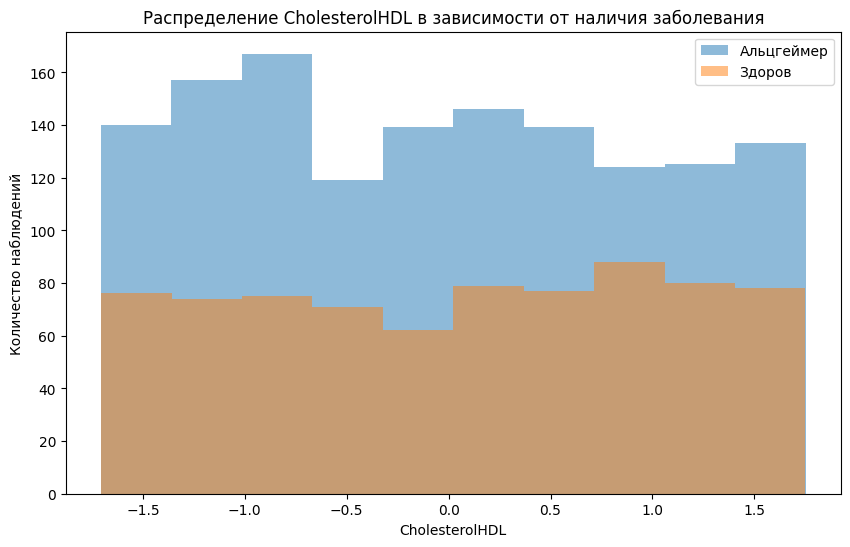

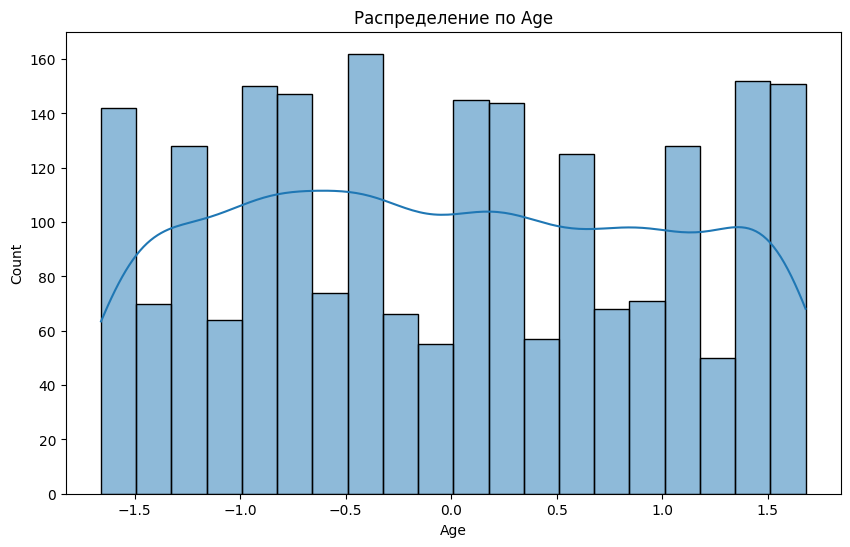

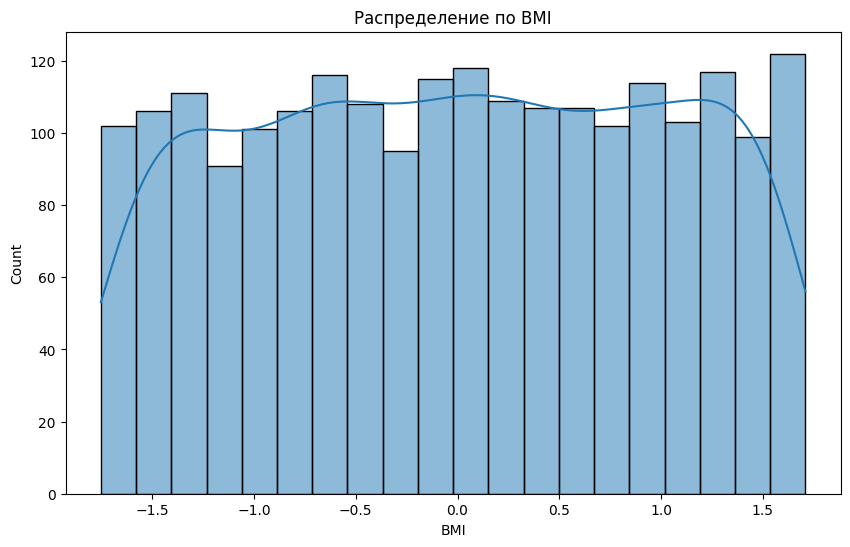

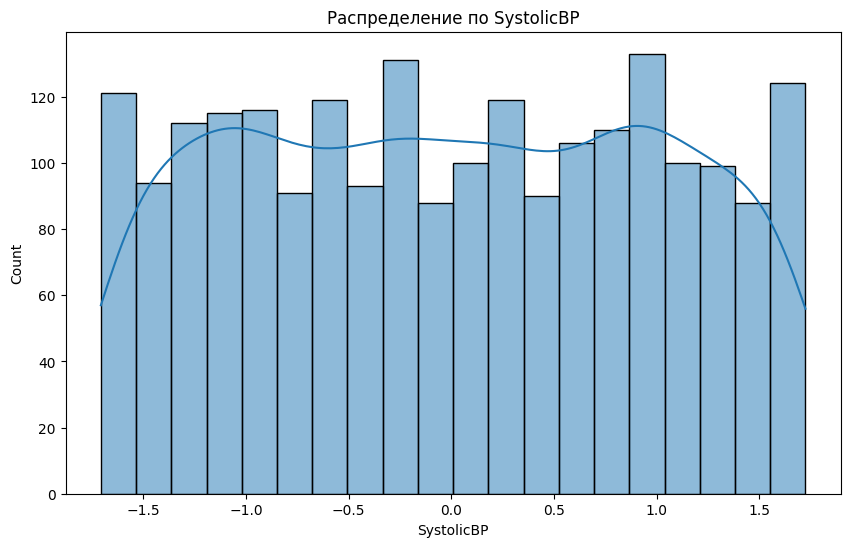

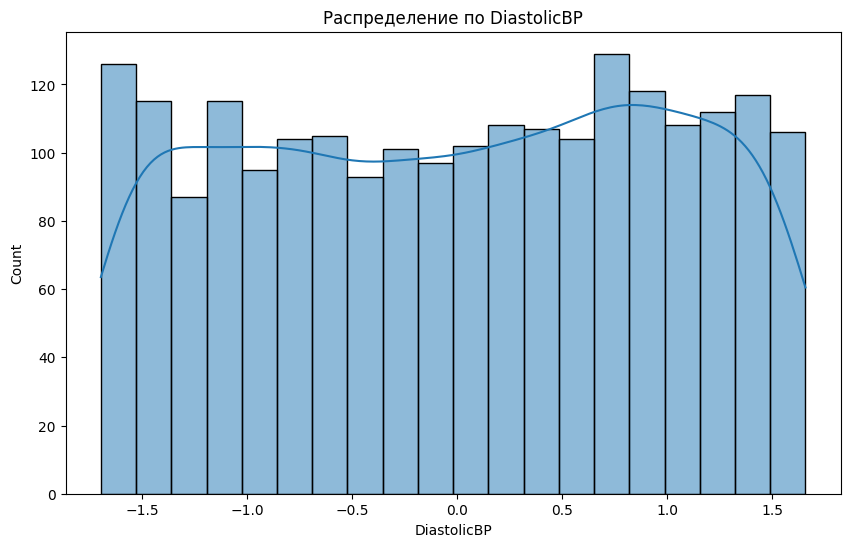

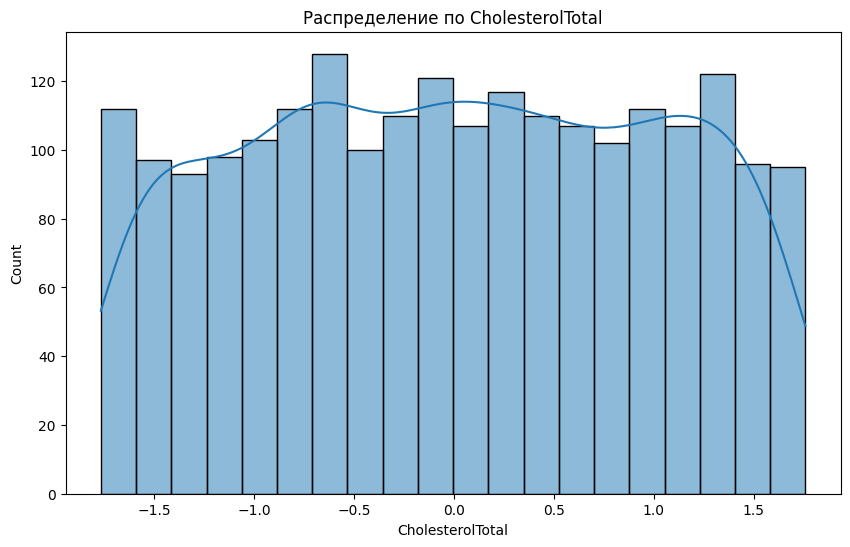

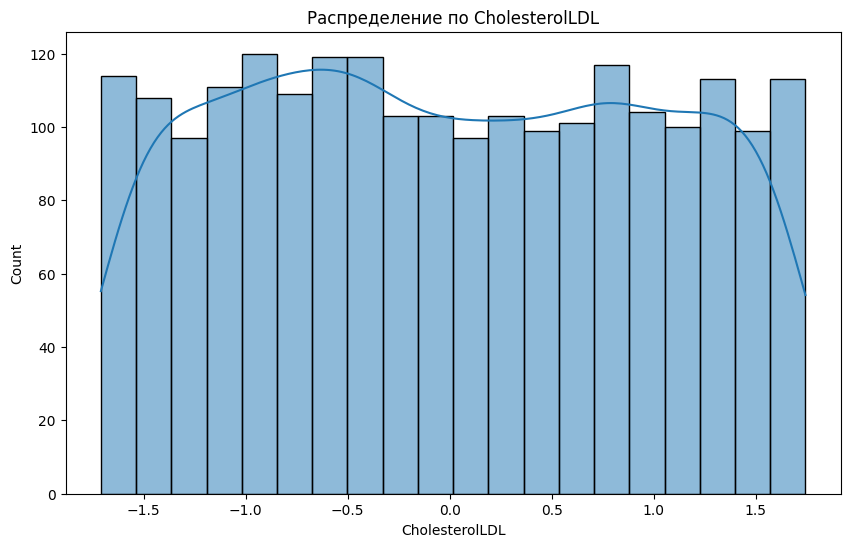

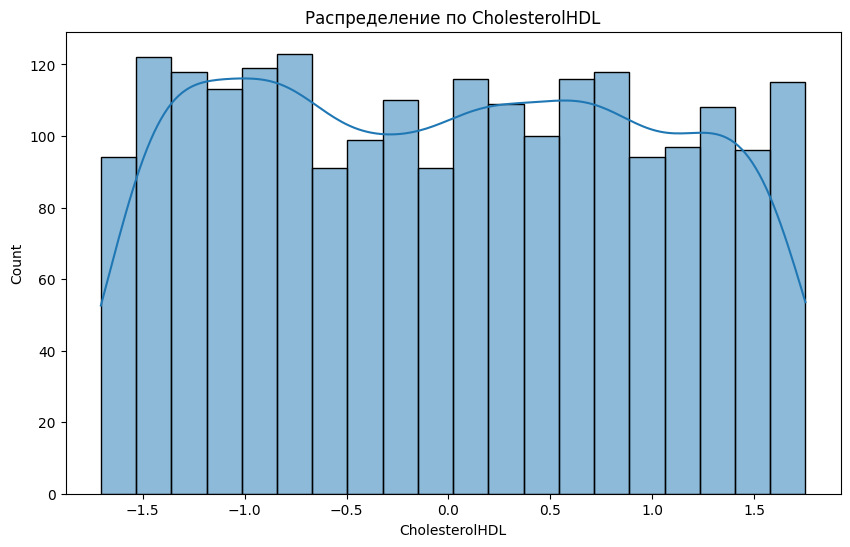

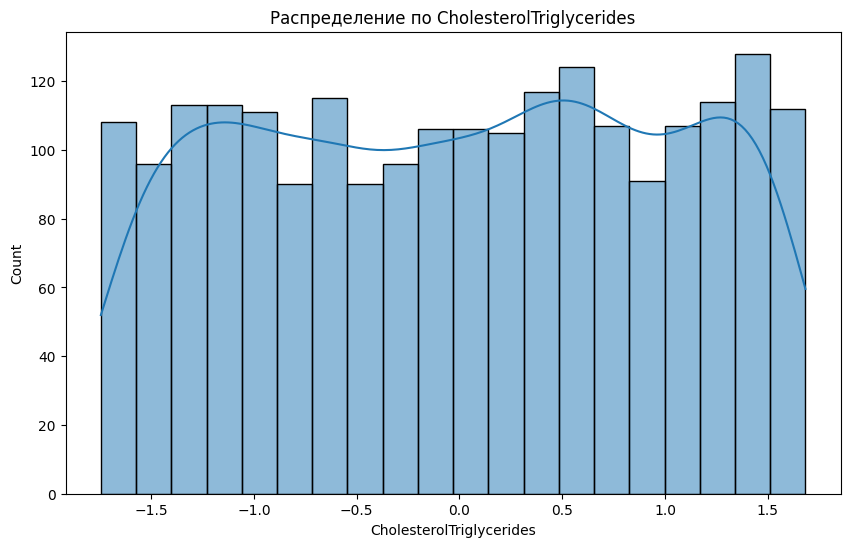

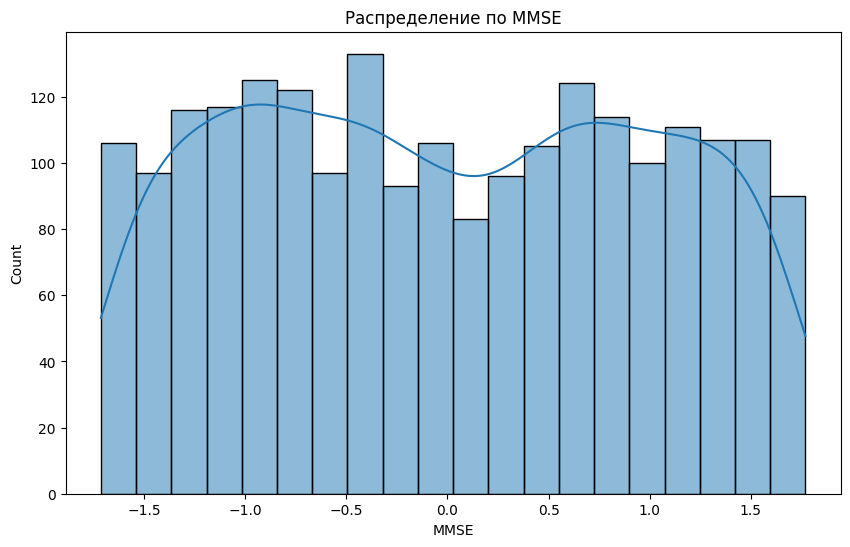

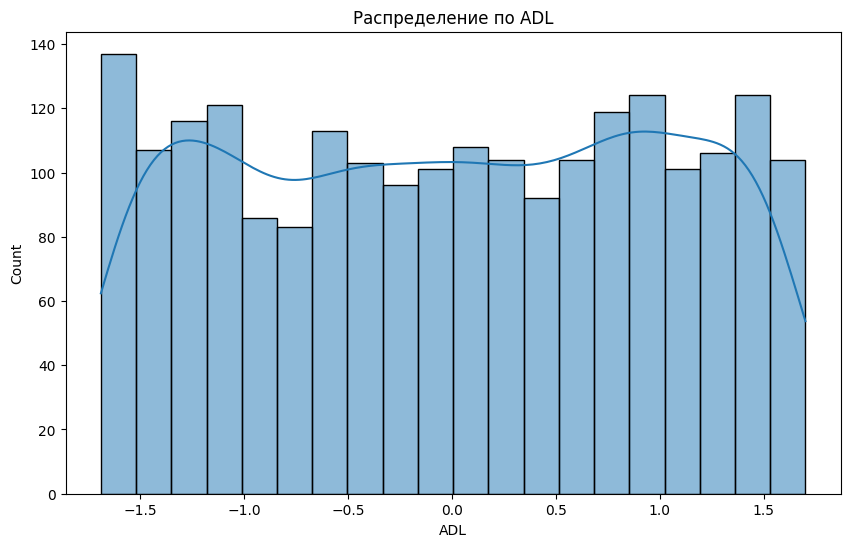

In [ ]:
visualisation(alc_df_scaled, features=features, target_column=target_column, numerical_features=numerical_features)